In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from skopt.space import Categorical, Real
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('penguins_size.csv')
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [4]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Biscoe               NaN              NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
339          NaN  NaN

# **Handling Missing Values**

In [9]:
df.drop([3,339], inplace=True)
df.shape

(342, 7)

In [10]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [11]:
Species = df['species'].value_counts()
Species

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [12]:
for col in df.columns:
    print(f"{col} Data has :", df[col].unique(), "\n")

species Data has : ['Adelie' 'Chinstrap' 'Gentoo'] 

island Data has : ['Torgersen' 'Biscoe' 'Dream'] 

culmen_length_mm Data has : [39.1 39.5 40.3 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6 36.6
 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9
 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1 35.
 34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1
 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2
 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2
 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6
 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5
 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8
 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1 42.6
 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4
 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9] 

culmen_depth_mm Data has : [18.7 1

In [13]:
df.dropna(axis = 0, inplace = True)
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 7 columns]

In [14]:
df = df[df['sex'] != '.']
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[333 rows x 7 columns]

In [15]:
ColPal = sns.crayon_palette(['Red', 'Yellow', 'Blue'])

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
plt.pie(Species, colors=ColPal, autopct = '% 1.f %%', labels=['Adelie','Gentoo','Chinstrap'])
plt.title("Persentase dari setiap spesies di dalam data")
plt.show()

[Text(0, 0, '168'), Text(0, 0, '165')]

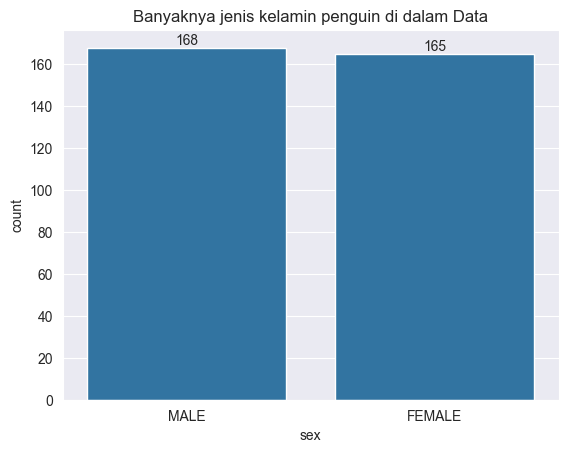

In [17]:
ax = sns.countplot(x=df['sex'])
ax.set_title("Banyaknya jenis kelamin penguin di dalam Data")
ax.bar_label(container=ax.containers[0], labels=df['sex'].value_counts())

Text(0.5, 1.0, 'Jenis Kelamin penguin berdasarkan spesies')

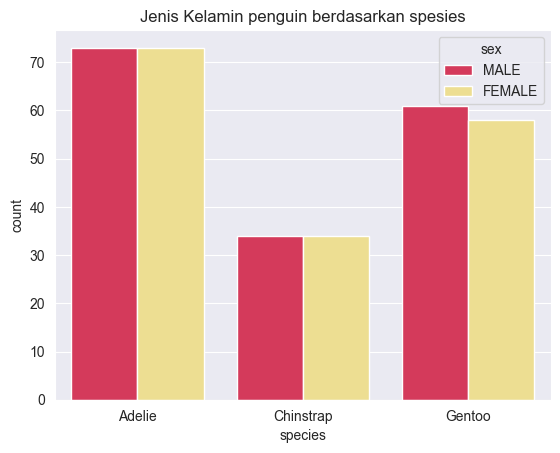

In [18]:
sns.countplot(hue=df['sex'], x=df['species'], palette = ColPal)
plt.title('Jenis Kelamin penguin berdasarkan spesies')

In [401]:
df['sex'].groupby(df['species']).value_counts()

species    sex   
Adelie     FEMALE    73
           MALE      73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     MALE      61
           FEMALE    58
Name: count, dtype: int64

In [403]:
df['island'].groupby(df['species']).value_counts()

species    island   
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       119
Name: count, dtype: int64

In [20]:
sns.countplot(x = df['island'], hue = df['species'], palette = ColPal)
plt.title('Tempat tinggal Penguin berdasarkan spesies')

Text(0.5, 1.0, 'Tempat tinggal Penguin berdasarkan spesies')

Text(0.5, 1.0, 'Perbedaan Panjang Cullmen di spesies berdasarkan jenis kelamin')

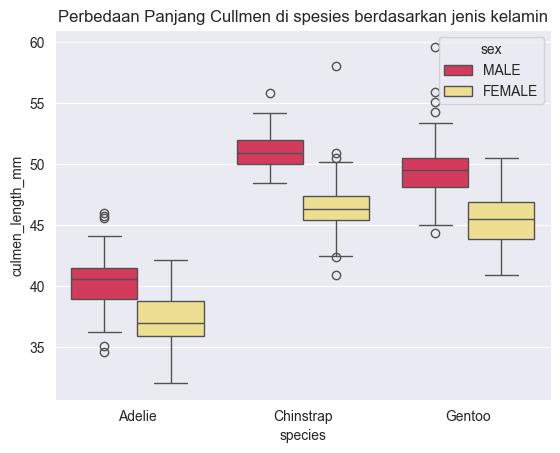

In [21]:
sns.boxplot(data=df, x='species', y='culmen_length_mm', hue='sex', palette = ColPal)
plt.title('Perbedaan Panjang Cullmen di spesies berdasarkan jenis kelamin')

In [408]:
df.groupby(['species','sex'])['culmen_length_mm'].describe()

count       mean       std   min     25%    50%     75%  \
species   sex                                                               
Adelie    FEMALE   73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
          MALE     73.0  40.390411  2.277131  34.6  39.000  40.60  41.500   
Chinstrap FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
          MALE     34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
Gentoo    FEMALE   58.0  45.563793  2.051247  40.9  43.850  45.50  46.875   
          MALE     61.0  49.473770  2.720594  44.4  48.100  49.50  50.500   

                   max  
species   sex           
Adelie    FEMALE  42.2  
          MALE    46.0  
Chinstrap FEMALE  58.0  
          MALE    55.8  
Gentoo    FEMALE  50.5  
          MALE    59.6

Text(0.5, 1.0, 'Perbandingan kedalaman culmen berdasarkan spesies dan jenis kelamin')

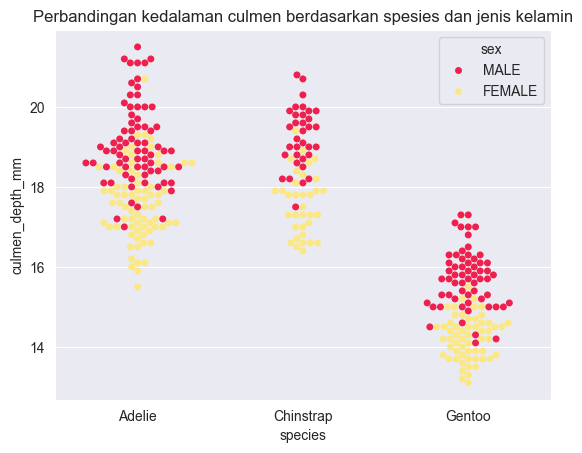

In [23]:
sns.swarmplot(data = df, x = 'species', y = 'culmen_depth_mm', hue = 'sex', palette = ColPal)
plt.title("Perbandingan kedalaman culmen berdasarkan spesies dan jenis kelamin")

In [24]:
df.groupby(['species','sex'])['culmen_depth_mm'].mean()

species    sex   
Adelie     FEMALE    17.621918
           MALE      19.072603
Chinstrap  FEMALE    17.588235
           MALE      19.252941
Gentoo     FEMALE    14.237931
           MALE      15.718033
Name: culmen_depth_mm, dtype: float64

Text(0.5, 1.0, 'Membandingkan panjang sirip berdasarkan spesies dan pulau')

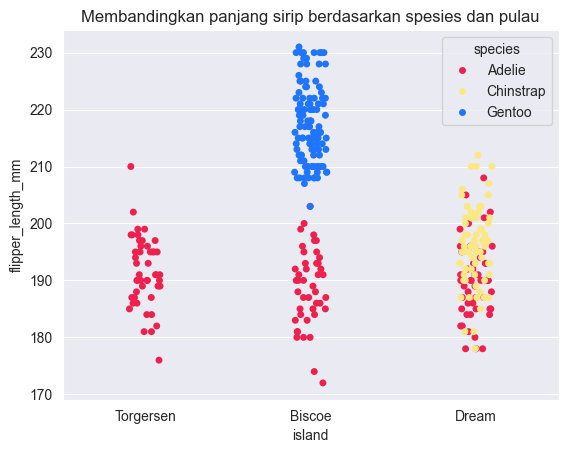

In [25]:
sns.stripplot(data = df, y = 'flipper_length_mm', x = 'island', hue = 'species', palette = ColPal)
plt.title("Membandingkan panjang sirip berdasarkan spesies dan pulau")  

In [26]:
g = sns.FacetGrid(df, col="species", hue="sex", palette = ColPal)
g.map_dataframe(sns.kdeplot, x="body_mass_g")
g.add_legend()

In [409]:
df.groupby(['species','sex'])["body_mass_g"].describe()

count         mean         std     min      25%     50%  \
species   sex                                                               
Adelie    FEMALE   73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
          MALE     73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
Chinstrap FEMALE   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
          MALE     34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
Gentoo    FEMALE   58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
          MALE     61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
species   sex                      
Adelie    FEMALE  3550.00  3900.0  
          MALE    4300.00  4775.0  
Chinstrap FEMALE  3693.75  4150.0  
          MALE    4100.00  4800.0  
Gentoo    FEMALE  4875.00  5200.0  
          MALE    5700.00  6300.0

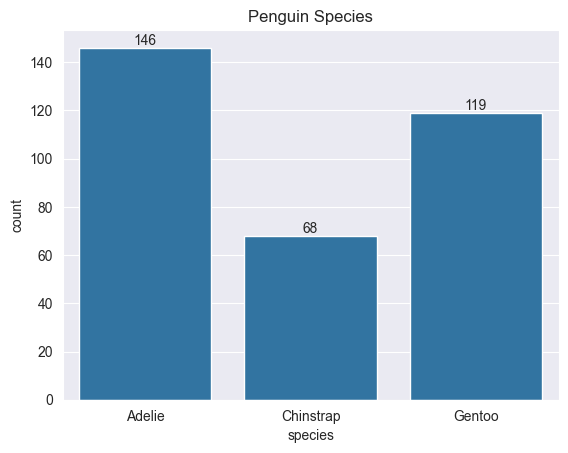

In [28]:
ax = sns.countplot(data=df, x="species")
ax.bar_label(ax.containers[0])
ax.set(title="Penguin Species")
plt.show()

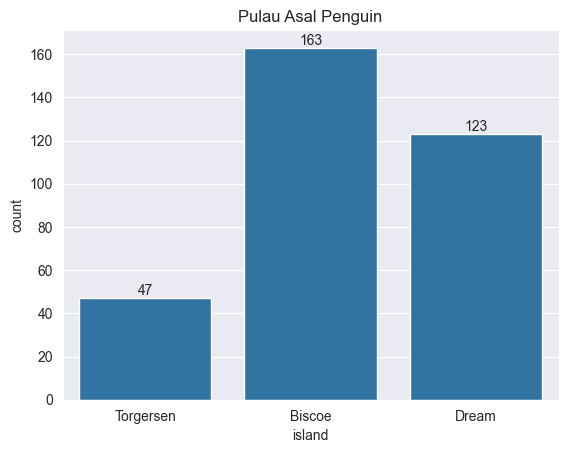

In [29]:
ax = sns.countplot(data=df, x="island")
ax.bar_label(ax.containers[0])
ax.set(title="Pulau Asal Penguin")
plt.show()

In [31]:
new_df = df.copy()
new_df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[333 rows x 7 columns]

In [32]:
new_df = new_df.drop(['species', 'island'],axis=1)
new_df

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
4                36.7             19.3              193.0       3450.0  FEMALE
5                39.3             20.6              190.0       3650.0    MALE
..                ...              ...                ...          ...     ...
338              47.2             13.7              214.0       4925.0  FEMALE
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[333 rows x 5 columns]

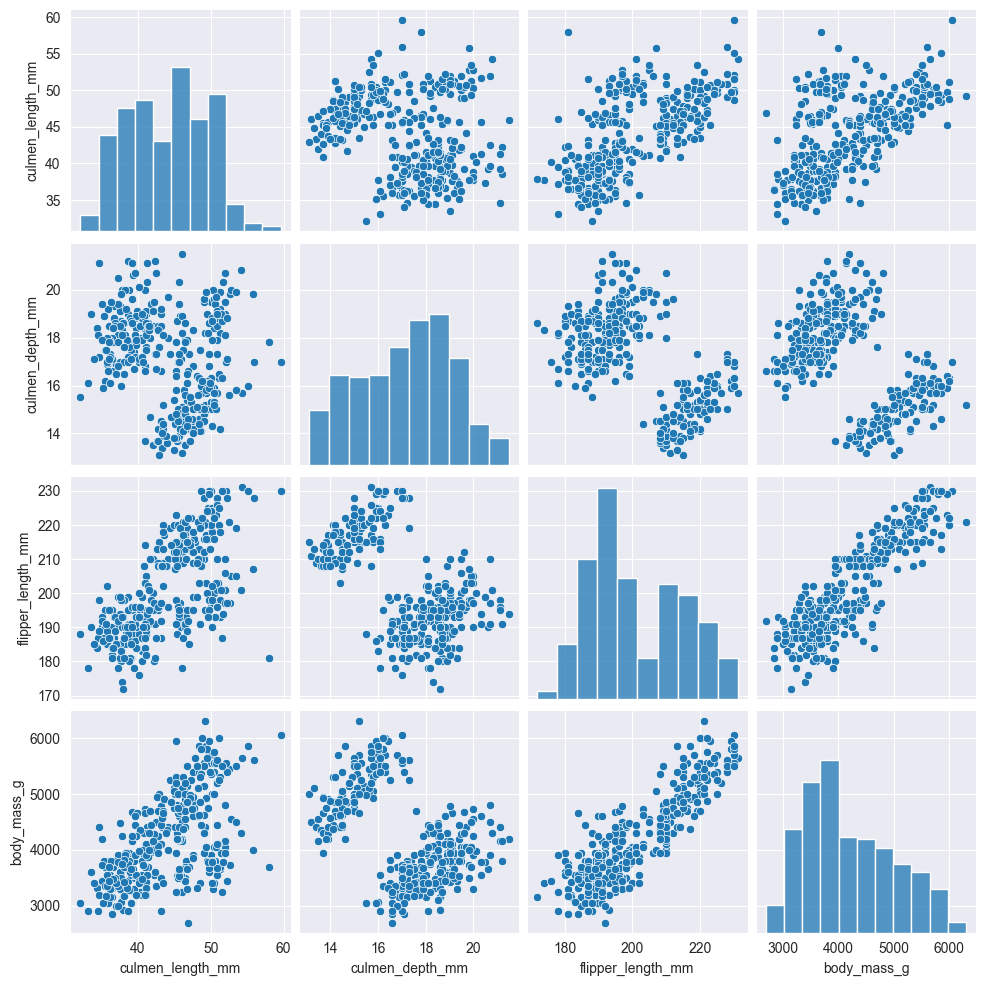

In [33]:
sns.pairplot(df)
plt.show()

# **Supervised Learning**

## **Cross-Validation**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from skopt import BayesSearchCV

In [344]:
k_fold = KFold(n_splits=10,shuffle=False)

In [345]:
train = new_df.drop('sex', axis = 1)
target = new_df['sex']
train.shape, target.shape

((333, 4), (333,))

In [346]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=42)

print("Bentuk data latih:", train_data.shape, train_target.shape)
print("Bentuk data uji:", test_data.shape, test_target.shape)


Bentuk data latih: (266, 4) (266,)
Bentuk data uji: (67, 4) (67,)


In [347]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

## **Random Forest Classifier**

In [426]:
param_grid = {
    'n_estimators': (25, 50),
    'max_features': ('sqrt', 'log2'),
    'max_depth': (3, 6),
    'max_leaf_nodes': (3, 6),
}


In [427]:
bayes_search = BayesSearchCV(RandomForestClassifier(),
                           search_spaces=param_grid)
bayes_search.fit(train_data, train_target)
print(bayes_search.best_params_)
print(bayes_search.best_score_)

OrderedDict([('max_depth', 4), ('max_features', 'log2'), ('max_leaf_nodes', 6), ('n_estimators', 33)])
0.909643605870021


In [444]:
rf_model = RandomForestClassifier(max_depth=4,
                                  max_features='log2',
                                  max_leaf_nodes=6,
                                  n_estimators=33)

In [445]:
rf_predict = cross_val_predict(rf_model,
                               train,
                               target,
                               cv=k_fold,
                               n_jobs=5)

In [446]:
cm = confusion_matrix(target, rf_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion Matrix:
 [[146  19]
 [ 23 145]]


In [447]:
print(classification_report(target,rf_predict))

              precision    recall  f1-score   support

      FEMALE       0.86      0.88      0.87       165
        MALE       0.88      0.86      0.87       168

    accuracy                           0.87       333
   macro avg       0.87      0.87      0.87       333
weighted avg       0.87      0.87      0.87       333


In [448]:
accuracy = accuracy_score(target, rf_predict)
print("Accuracy:", accuracy)

Accuracy: 0.8738738738738738


In [449]:
rf_model.fit(train, target_encoded)
rf_predict_proba = cross_val_predict(rf_model,
                                     train,
                                     target,
                                     cv=k_fold,
                                     method='predict_proba')

In [450]:
fpr, tpr, thresholds = roc_curve(target_encoded,
                                 rf_predict_proba[:, 1])
roc_auc = roc_auc_score(target_encoded,
                        rf_predict_proba[:, 1])

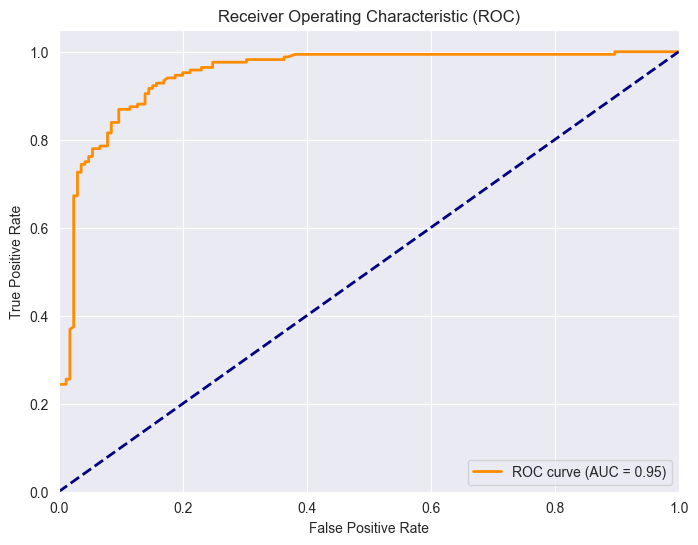

In [451]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **Support Vector Classifier**

In [452]:
param_grid = {
    'C': Real(1e-6, 12+66),
    'gamma': Real(1e-6, 1e+6),
    'kernel': Categorical(['rbf'])
}


In [456]:
svc_model = SVC()
bayes_search = BayesSearchCV(estimator=svc_model,
                           search_spaces=param_grid,
                           cv=k_fold,
                           n_jobs=5,
                           scoring='accuracy')
bayes_search.fit(train_data, train_target)

BayesSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
              estimator=SVC(), n_jobs=5, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=78, prior='uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             'kernel': Categorical(categories=('rbf',), prior=None)})

In [457]:
print("Hyperparameter terbaik:", bayes_search.best_params_)
print("Akurasi terbaik:", bayes_search.best_score_)

Hyperparameter terbaik: OrderedDict([('C', 78.0), ('gamma', 1e-06), ('kernel', 'rbf')])
Akurasi terbaik: 0.7735042735042735


In [151]:
svc_model = SVC(C = 78, gamma=1e-06, kernel='rbf')

In [152]:
svc_predict = cross_val_predict(svc_model,
                                train,
                                target,
                                cv=k_fold,
                                n_jobs=5)

Confusion Matrix:
 [[129  36]
 [ 40 128]]


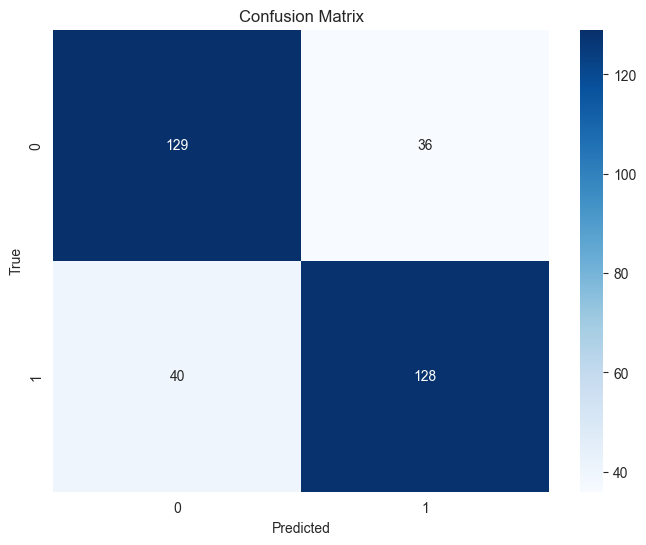

In [153]:
cm = confusion_matrix(target, svc_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [154]:
print(classification_report(target, svc_predict))

              precision    recall  f1-score   support

      FEMALE       0.76      0.78      0.77       165
        MALE       0.78      0.76      0.77       168

    accuracy                           0.77       333
   macro avg       0.77      0.77      0.77       333
weighted avg       0.77      0.77      0.77       333


In [155]:
accuracy = accuracy_score(target, svc_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7717717717717718


In [156]:
svc_model.fit(train, target_encoded)
svc_predict_proba = cross_val_predict(svc_model,
                                      train,
                                      target_encoded,
                                      cv=k_fold,
                                      method='decision_function')

In [157]:
fpr, tpr, thresholds = roc_curve(target_encoded, svc_predict_proba)
roc_auc = roc_auc_score(target_encoded, svc_predict_proba)


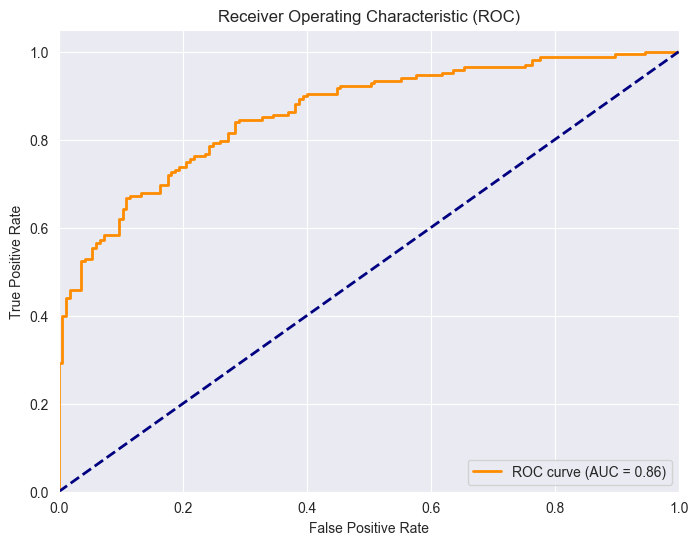

In [158]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Naive Bayes**

In [159]:
from sklearn.naive_bayes import GaussianNB  
from skopt import BayesSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [459]:
model = GaussianNB()
param_grid ={'var_smoothing': np.logspace(0,-9, num=100)}
bayes_search = BayesSearchCV(estimator=model, cv=5, n_jobs=-1, search_spaces=param_grid)
bayes_search.fit(train, target)

BayesSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
              search_spaces={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [460]:
print("Hyperparameter terbaik:", bayes_search.best_params_)
print("Akurasi terbaik:", bayes_search.best_score_)

Hyperparameter terbaik: OrderedDict([('var_smoothing', 2.848035868435805e-09)])
Akurasi terbaik: 0.6817277250113072


In [162]:
NB_model = GaussianNB(var_smoothing=4.3287612810830526e-08)

In [163]:
NB_predict = cross_val_predict(NB_model,
                               train,
                               target,
                               cv=k_fold,
                               n_jobs=5)

In [164]:
cm = confusion_matrix(target, NB_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion Matrix:
 [[121  44]
 [ 55 113]]


In [165]:
print(classification_report(target, NB_predict))

              precision    recall  f1-score   support

      FEMALE       0.69      0.73      0.71       165
        MALE       0.72      0.67      0.70       168

    accuracy                           0.70       333
   macro avg       0.70      0.70      0.70       333
weighted avg       0.70      0.70      0.70       333


In [166]:
accuracy = accuracy_score(target, NB_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7027027027027027


In [167]:
NB_model.fit(train, target_encoded)
NB_predict_proba = cross_val_predict(NB_model,
                                     train,
                                     target_encoded,
                                     cv=k_fold,
                                     method='predict_proba')

In [168]:
fpr, tpr, thresholds = roc_curve(target_encoded, NB_predict_proba[:, 1])
roc_auc = roc_auc_score(target_encoded, NB_predict_proba[:, 1])

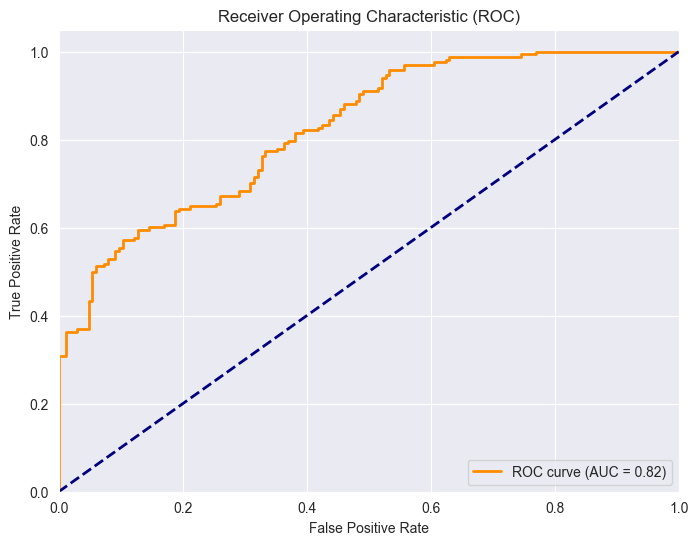

In [169]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Artificial Neural Network**

In [247]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputSpec
from sklearn.metrics import roc_auc_score, roc_curve

In [379]:
ANN_model = Sequential([
    Dense(600, activation='relu', input_shape=train_data.shape[1:]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [380]:
ANN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [384]:
history = ANN_model.fit(train,
                        target_encoded,
                        epochs=200,
                        batch_size=32,
                        verbose=2)

Epoch 1/200
11/11 - 0s - 7ms/step - accuracy: 0.6126 - loss: 0.7794
Epoch 2/200
11/11 - 0s - 19ms/step - accuracy: 0.6156 - loss: 0.7849
Epoch 3/200
11/11 - 0s - 18ms/step - accuracy: 0.6607 - loss: 0.6307
Epoch 4/200
11/11 - 0s - 8ms/step - accuracy: 0.6396 - loss: 0.6338
Epoch 5/200
11/11 - 0s - 7ms/step - accuracy: 0.7057 - loss: 0.5988
Epoch 6/200
11/11 - 0s - 15ms/step - accuracy: 0.6787 - loss: 0.6397
Epoch 7/200
11/11 - 0s - 15ms/step - accuracy: 0.6907 - loss: 0.5718
Epoch 8/200
11/11 - 0s - 15ms/step - accuracy: 0.6817 - loss: 0.6109
Epoch 9/200
11/11 - 0s - 7ms/step - accuracy: 0.6547 - loss: 0.6577
Epoch 10/200
11/11 - 0s - 7ms/step - accuracy: 0.6997 - loss: 0.5607
Epoch 11/200
11/11 - 0s - 7ms/step - accuracy: 0.5646 - loss: 0.8912
Epoch 12/200
11/11 - 0s - 8ms/step - accuracy: 0.5405 - loss: 1.0354
Epoch 13/200
11/11 - 0s - 8ms/step - accuracy: 0.6637 - loss: 0.5984
Epoch 14/200
11/11 - 0s - 14ms/step - accuracy: 0.6006 - loss: 0.6990
Epoch 15/200
11/11 - 0s - 7ms/step - 

In [385]:
predictions = (ANN_model.predict(train)>0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [386]:
cm = confusion_matrix(target_encoded, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[126  39]
 [ 57 111]]


In [387]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [388]:
print(classification_report(target_encoded, predictions))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       165
           1       0.74      0.66      0.70       168

    accuracy                           0.71       333
   macro avg       0.71      0.71      0.71       333
weighted avg       0.71      0.71      0.71       333


In [389]:
accuracy = accuracy_score(target_encoded, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7117117117117117


In [390]:
y_pred_proba = ANN_model.predict(train)
auc = roc_auc_score(target_encoded, y_pred_proba)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [391]:
fpr, tpr, thresholds = roc_curve(target_encoded, y_pred_proba)

In [392]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()